In [16]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]
type(dta)

list

In [18]:
dta=pd.Series(dta)
dta.head(5)

0    10930
1    10318
2    10595
3    10972
4     7706
dtype: int64

In [19]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.head(5)

2001-12-31    10930
2002-12-31    10318
2003-12-31    10595
2004-12-31    10972
2005-12-31     7706
dtype: int64

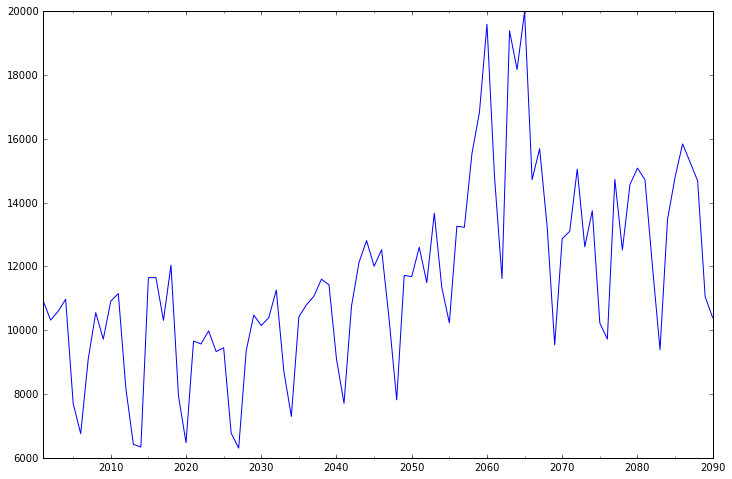

In [20]:
dta.plot(figsize=(12,8))

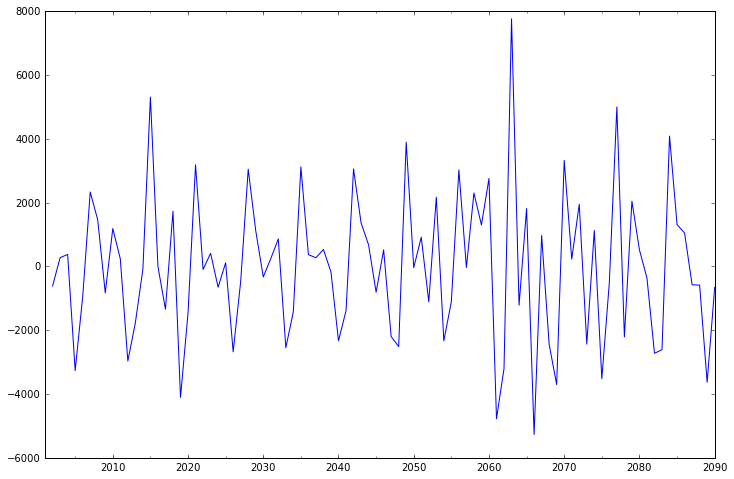

In [21]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

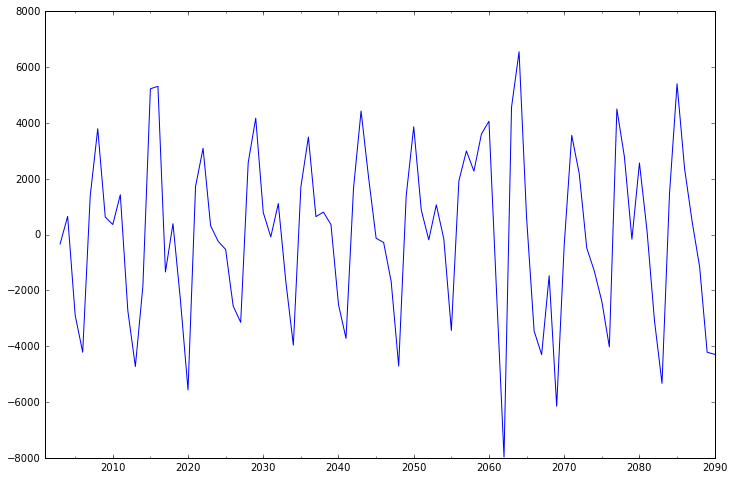

In [22]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

In [23]:
dta= dta.diff(1)
dta = dta.dropna()
dta.head(2)

2002-12-31   -612.0
2003-12-31    277.0
dtype: float64

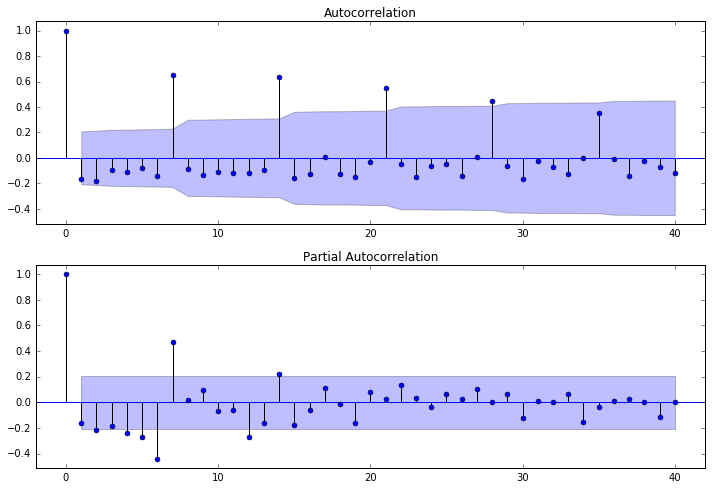

In [24]:

#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [25]:
arma_mod20 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

1579.7025547698622 1602.1002821 1588.7304359
1632.3203732818517 1639.78628239 1635.32966699
1581.0916056023682 1605.9779693 1591.12258464
1581.3957835812896 1606.28214728 1591.42676262


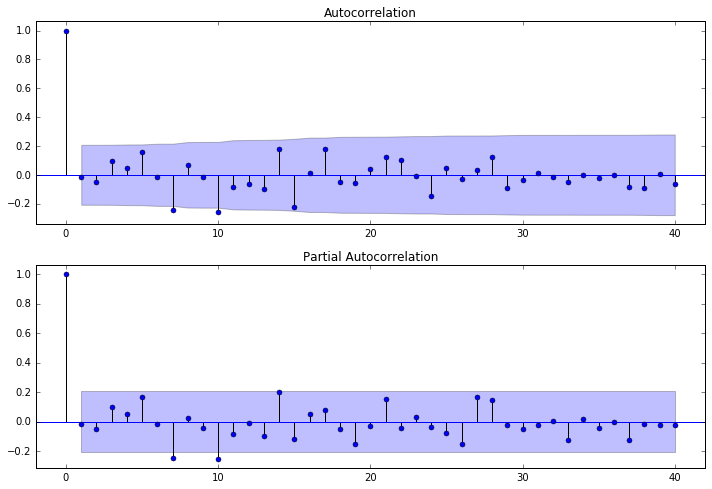

In [26]:
resid = arma_mod20.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [27]:
print(sm.stats.durbin_watson(arma_mod20.resid.values))

2.02424397658


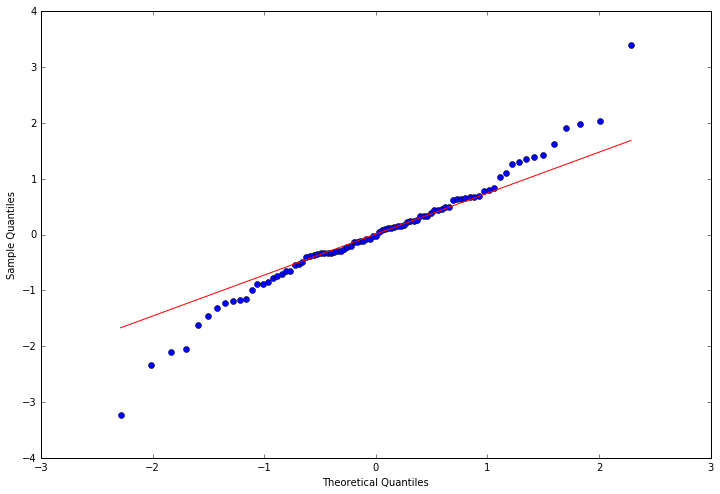

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [29]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.014445   0.019203  0.889787
2.0  -0.047441   0.228719  0.891937
3.0   0.097778   1.129071  0.770061
4.0   0.047514   1.344178  0.853837
5.0   0.156219   3.697169  0.593785
6.0  -0.017855   3.728277  0.713392
7.0  -0.241230   9.475801  0.220275
8.0   0.068078   9.939206  0.269319
9.0  -0.012041   9.953884  0.354231
10.0 -0.256684  16.708534  0.081067
11.0 -0.085178  17.461876  0.094936
12.0 -0.063577  17.887020  0.119164
13.0 -0.096512  18.879625  0.126883
14.0  0.181119  22.422035  0.070349
15.0 -0.223097  27.869396  0.022401
16.0  0.012916  27.887906  0.032608
17.0  0.176769  31.402773  0.017833
18.0 -0.053140  31.724890  0.023694
19.0 -0.057704  32.110144  0.030374
20.0  0.037425  32.274550  0.040459
21.0  0.120519  34.004506  0.036199
22.0  0.102662  35.278530  0.036225
23.0 -0.007830  35.286052  0.048710
24.0 -0.148547  38.035511  0.034383
25.0  0.046254  38.306255  0.043173
26.0 -0.032621  38.443055  0

2090-12-31   -1236.076366
2091-12-31    3548.997274
2092-12-31    1236.670206
2093-12-31     649.937604
2094-12-31    -530.531346
2095-12-31    -611.702057
2096-12-31   -2290.225833
2097-12-31    -726.542027
2098-12-31    2740.837210
2099-12-31     952.981592
2100-12-31     277.205043
Freq: A-DEC, dtype: float64


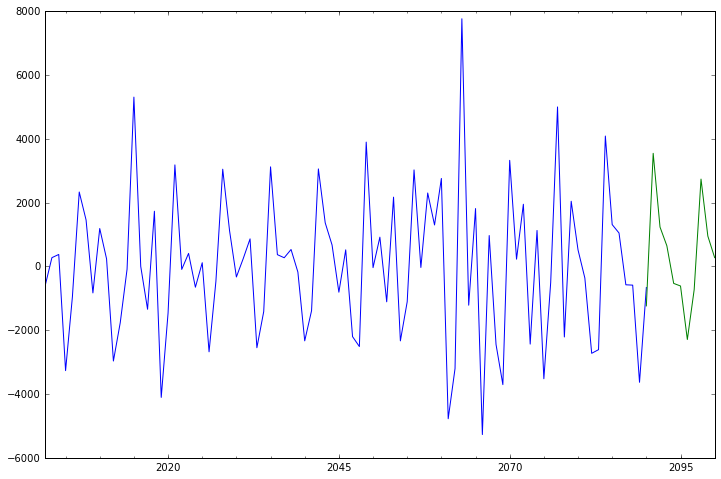

In [30]:
predict_sunspots = arma_mod20.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)